In [1]:
import numpy as np
import pandas as pd

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract of the dataset

In [3]:
data = pd.read_csv('trades/2011-07.csv')
data.head()

,Trade_Id,Date,User_Id,Japan,Type,Currency,Bitcoins,Money,Money_Rate,Money_JPY,Money_Fee,Money_Fee_Rate,Money_Fee_JPY,Bitcoin_Fee,Bitcoin_Fee_JPY
0,1309478459355721,2011-07-01 00:00:59,61717,NJP,buy,USD,0.100000,1.61010,80.433128,129.505380,0,80.433128,0,0.0003,0.389795
1,1309478459355721,2011-07-01 00:00:59,4125,NJP,sell,USD,0.100000,1.61010,80.433128,129.505380,0,80.433128,0,0.0000,0.000000
2,1309478466574560,2011-07-01 00:01:06,57157,NJP,buy,USD,1.000000,16.10098,80.433128,1295.052186,0,80.433128,0,0.0000,0.000000
3,1309478466574560,2011-07-01 00:01:06,4125,NJP,sell,USD,1.000000,16.10098,80.433128,1295.052186,0,80.433128,0,0.0000,0.000000
4,1309478468980270,2011-07-01 00:01:08,337,NJP,buy,USD,1.705052,27.45300,80.433128,2208.130665,0,80.433128,0,0.0000,0.000000


In [27]:
#data[data.Bitcoin_Fee_JPY == 0].head()

# Relation between price and volume

In [17]:
price_usd = pd.DataFrame(data["Money"]/data["Bitcoins"], columns=['Price_USD'])
data = data.join(price_usd)

C:\Users\stéphane\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


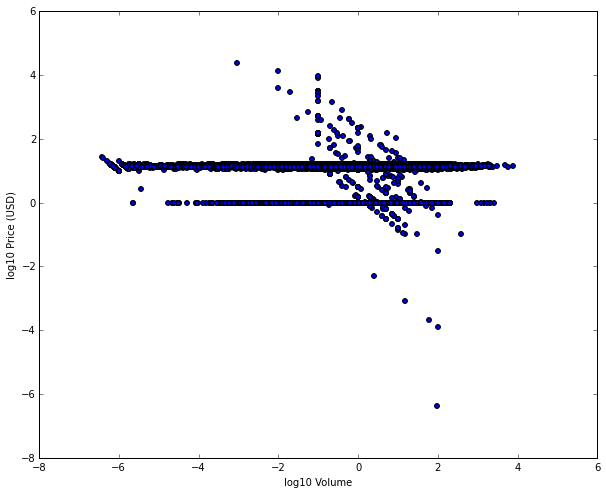

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0)

plt.scatter(np.log10(data.Bitcoins),np.log10(data.Price_USD))
plt.xlabel("log10 Volume")
plt.ylabel("log10 Price (USD)")
#plt.yscale('log')
#plt.xscale('log')

# A la recherche du plus malin

In [19]:
data[data["Price_USD"] > 5000].head()

,Trade_Id,Date,User_Id,Japan,Type,Currency,Bitcoins,Money,Money_Rate,Money_JPY,Money_Fee,Money_Fee_Rate,Money_Fee_JPY,Bitcoin_Fee,Bitcoin_Fee_JPY,Price_USD
52416,1309894966308831,2011-07-05 19:42:46,1,NJP,buy,USD,0.000941,22.68774,80.765517,1832.387056,0,80.765517,0,0,0,24110.244421
52417,1309894966308831,2011-07-05 19:42:46,42907,NJP,sell,USD,0.000941,22.68774,80.765517,1832.387056,0,80.765517,0,0,0,24110.244421
74950,1309974301821528,2011-07-06 17:45:01,43998,NJP,buy,USD,0.100000,802.50000,81.066316,65055.718830,0,81.066316,0,0,0,8025.000000
74951,1309974301821528,2011-07-06 17:45:01,35256,NJP,sell,USD,0.100000,802.50000,81.066316,65055.718830,0,81.066316,0,0,0,8025.000000
82346,1309999207385807,2011-07-07 00:40:07,16383,NJP,buy,USD,0.010000,133.90191,81.037854,10851.123493,0,81.037854,0,0,0,13390.191000


In [20]:
data[data["Bitcoins"] < 0.001].head()

,Trade_Id,Date,User_Id,Japan,Type,Currency,Bitcoins,Money,Money_Rate,Money_JPY,Money_Fee,Money_Fee_Rate,Money_Fee_JPY,Bitcoin_Fee,Bitcoin_Fee_JPY,Price_USD
392,1309479643125187,2011-07-01 00:20:43,26611,NJP,buy,USD,0.000060,0.00096,80.433128,0.077216,0,80.433128,0,0.000000e+00,0.000000,16.029387
393,1309479643125187,2011-07-01 00:20:43,4125,NJP,sell,USD,0.000060,0.00096,80.433128,0.077216,0,80.433128,0,0.000000e+00,0.000000,16.029387
1070,1309484817341541,2011-07-01 01:46:57,66207,NJP,buy,USD,0.000122,0.00200,80.433128,0.160866,0,80.433128,0,3.700000e-07,0.000481,16.400164
1071,1309484817341541,2011-07-01 01:46:57,4125,NJP,sell,USD,0.000122,0.00200,80.433128,0.160866,0,80.433128,0,0.000000e+00,0.000000,16.400164
1464,1309486957446593,2011-07-01 02:22:37,7761,NJP,buy,USD,0.000229,0.00377,80.433128,0.303233,0,80.433128,0,6.900000e-07,0.000897,16.474393


In [ ]:
min_Trade_Id = min(data["Trade_Id"]); 
max_Trade_Id = max(data["Trade_Id"]);
data["Trade_Id"] = data["Trade_Id"] - min_Trade_Id;
data.head()

In [26]:
#data[data["User_Id"] == 43998].head()
#data[data["User_Id"] == 1].head()

In [24]:
#etendu_trade_id = max_Trade_Id - min_Trade_Id
#bins = np.linspace(min_Trade_Id, max_Trade_Id, etendu_trade_id)
#bins = np.arange(min_Trade_Id,max_Trade_Id +1)
#plt.plot([data["Bitcoins"],data["Trade_Id"]])

In [ ]:
merg = data[data.Type == 'buy'].groupby('User_Id')
price_buy = merg.mean()['Price_USD']
merg2 = data[data.Type == 'sell'].groupby('User_Id')
price_sell = merg2.mean()['Price_USD']

In [ ]:
max_buy = max(price_buy)
min_sell = min(price_sell)
best_buyer = price_buy[price_buy == max_buy]
best_seller = price_sell[price_sell == min_sell]

In [ ]:
print (best_buyer)
print (best_seller)

In [ ]:
pri_buy[pri_buy == max_price]

In [ ]:
max_buy = max(maxprice_buy)

In [ ]:
X = data.values
p = len(data.values)
price_volumique = np.zeros(shape=(p,1))
price_volumique
#d = pd.DataFrame(price_volumique, columns = 'price_volumique)
#price_volumique = np.ones(p)
#data = pd.DataFrame(data["price_volumique"][1], columns = ['price_volumique'])